In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
from google.colab import files
uploaded = files.upload()


Saving House_price.csv to House_price.csv


In [2]:
import io
df = pd.read_csv(io.BytesIO(uploaded['House_price.csv']))

In [ ]:
#Checking for missing values
missing_data = df.isnull()
missing_data.head()

,Avg. Area Income,House Age,Number of Rooms,Area Population,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [ ]:
print(df.shape)
df

(4548, 5)


,Avg. Area Income,House Age,Number of Rooms,Area Population,Price
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05
...,...,...,...,...,...
4543,84556.63627,5.092459,6.723412,31797.31744,1.326847e+06
4544,82732.98111,5.332712,6.198476,41136.52722,1.252664e+06
4545,65694.05127,6.436741,6.704929,43406.71203,1.359763e+06
4546,76061.35071,7.148713,7.546066,40876.96459,1.778013e+06


In [ ]:
#Discription of data
df.describe()

,Avg. Area Income,House Age,Number of Rooms,Area Population,Price
count,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03
mean,68611.700818,5.978918,6.987646,36187.469334,1.233916e+06
std,10686.487761,0.990850,1.006587,9910.189915,3.545676e+05
min,17796.631190,2.644304,3.236194,172.610686,1.593866e+04
25%,61485.150192,5.332187,6.299692,29423.163510,9.977751e+05
50%,68817.036575,5.960872,7.002245,36215.560985,1.234571e+06
75%,75820.741747,6.658368,7.665871,42880.554642,1.470616e+06
max,107701.748400,9.519088,10.759588,69592.040240,2.469066e+06


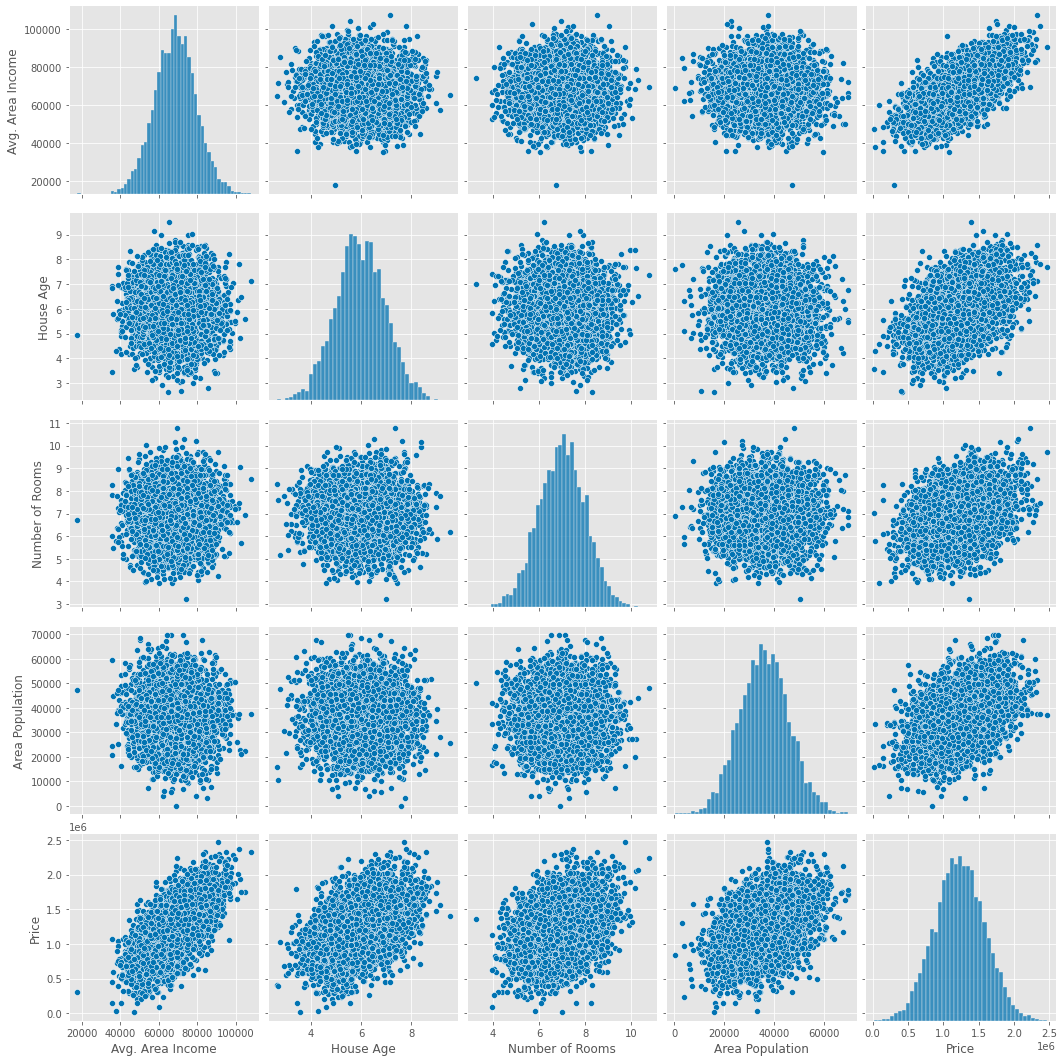

In [ ]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df, height=3)

In [ ]:
# Set independent and dependent variables
X = df[['Avg. Area Income','House Age','Number of Rooms','Area Population']]
y = df['Price']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -2639655.6738570165
Coefficients: [2.16143843e+01 1.65371672e+05 1.21973619e+05 1.51853558e+01]


Pearson correlation coefficient matrix of each variables:
                      Price  Avg. Area Income  House Age  Number of Rooms  \
Price             1.000000          0.641382   0.450134         0.341573   
Avg. Area Income  0.641382          1.000000  -0.010143        -0.006592   
House Age         0.450134         -0.010143   1.000000         0.002683   
Number of Rooms   0.341573         -0.006592   0.002683         1.000000   
Area Population   0.411453         -0.007292  -0.014900        -0.003877   

                  Area Population  
Price                    0.411453  
Avg. Area Income        -0.007292  
House Age               -0.014900  
Number of Rooms         -0.003877  
Area Population          1.000000  


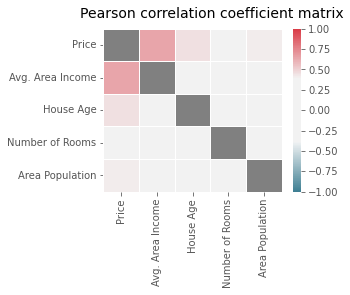

In [3]:
#Correlation Matrix
corr = df[['Price', 'Avg. Area Income','House Age','Number of Rooms','Area Population']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

In [ ]:
# Fitting Multiple Linear Regression Model
X = df[['Avg. Area Income','House Age','Number of Rooms','Area Population']]
Y = df['Price']
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)


In [ ]:
X = X = df[['Avg. Area Income','House Age','Number of Rooms','Area Population']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df['Price'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.284e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:26:43   Log-Likelihood:                -58862.
No. Observations:                4548   AIC:                         1.177e+05
Df Residuals:                    4543   BIC:                         1.178e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -2.64e+06   1.79e+04  

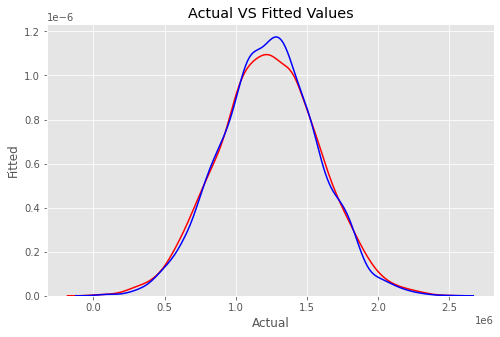

In [ ]:
y_hat = ols.predict(X)
y_hat
plt.figure(figsize=(height,width))
ax1 = sns.distplot(df['Price'],hist = False ,color="r" , label ="Actual Value")
sns.distplot(y_hat,hist = False ,color="b" , label ="Fitted Value",ax= ax1)
plt.title("Actual VS Fitted Values")
plt.xlabel("Actual")
plt.ylabel("Fitted")
plt.show()
plt.close()


In [ ]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.9187600541495106


In [ ]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 12844.441494590443
Probability of observing value at least as high as F-statistic: 0.0


In [ ]:
print(olsmod.pvalues)

const               0.0
Avg. Area Income    0.0
House Age           0.0
Number of Rooms     0.0
Area Population     0.0
dtype: float64


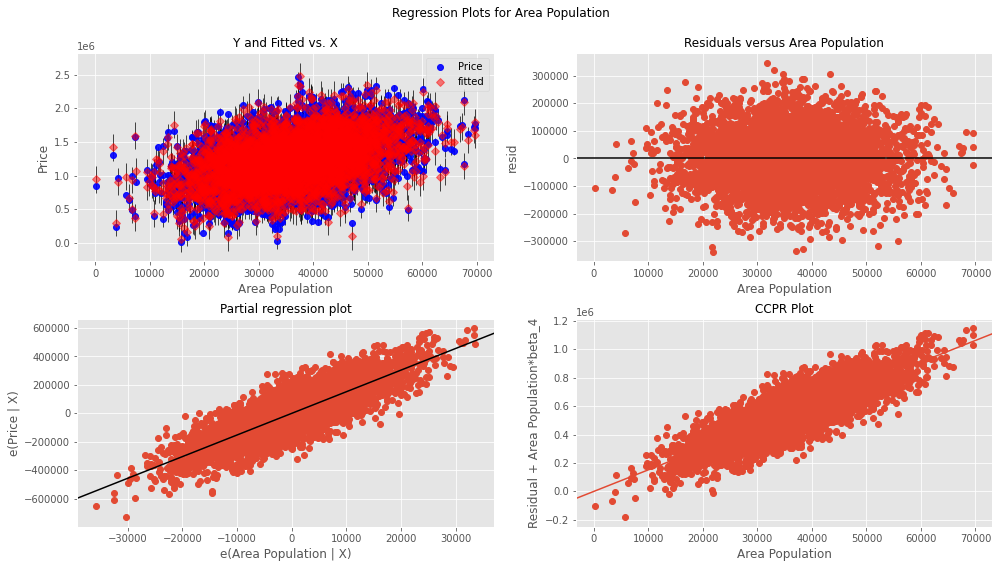

In [ ]:

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(olsmod, 'Area Population', fig=fig)